In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
!rm -r modules

In [3]:
# import modules
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [4]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *

In [5]:
num_qubits = 4

In [6]:
backend = Aer.get_backend('statevector_simulator')

In [7]:
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr,cr)

In [8]:
initial_state = [0]

In [9]:
initialize_quantum_circuit(qc,initial_state)
qc.barrier()

In [10]:
qft(qc,4)
qc.barrier()

In [11]:
# make a measurement
#output_qubits = list(range(num_qubits))
#make_meaurement(qc,qr,cr,output_qubits)

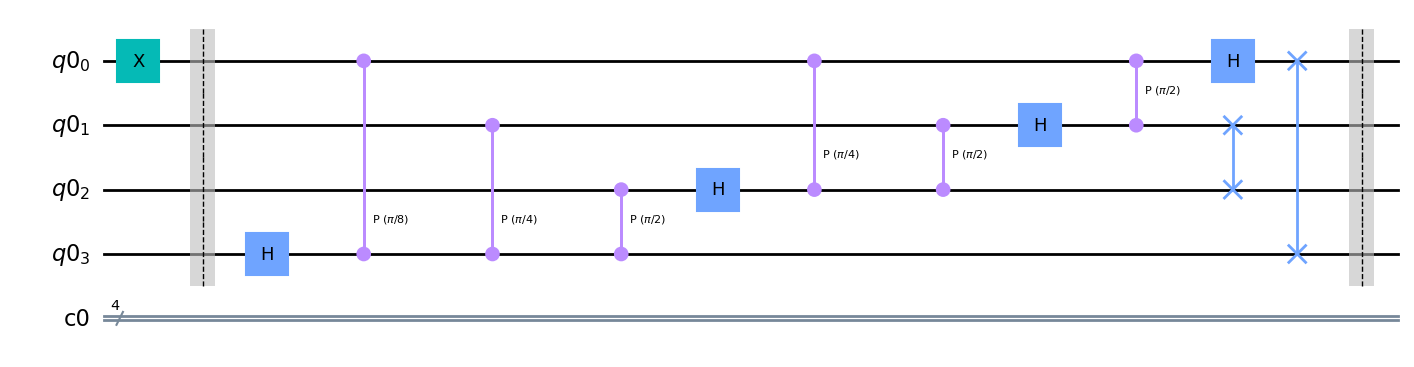

In [12]:
qc.draw("mpl")

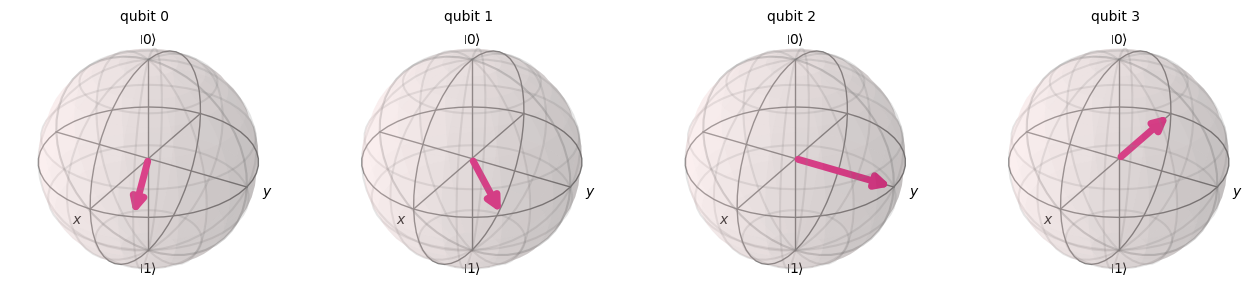

In [13]:
plot_bloch_multivector(execute(qc,backend).result().get_statevector())